In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
recidivism = pd.read_csv(
    '/Users/darshanasridhar/Documents/Ga Capstone Datasets /Recidivism/3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa.csv')

In [25]:
recidivism['Offense Classification'] = recidivism['Offense Classification'].replace('Other Misdemeanor', 'Simple Misdemeanor')

recidivism['Offense Classification'] = recidivism['Offense Classification'].replace('Felony - Enhancement to Original Penalty', 'Other Felony')
recidivism['Offense Classification'] = recidivism['Offense Classification'].replace('Felony - Enhanced', 'Other Felony')
recidivism['Offense Classification'] = recidivism['Offense Classification'].replace('Other Felony (Old Code)', 'Other Felony')
recidivism['Offense Classification'] = recidivism['Offense Classification'].replace('Felony - Mandatory Minimum', 'Other Felony')
recidivism['Offense Classification'] = recidivism['Offense Classification'].replace('Sexual Predator Community Supervision', 'Other Felony')

recidivism['Offense Classification'] = recidivism['Offense Classification'].replace('Special Sentence 2005', 'C Felony')

In [26]:
recidivism['Offense Classification'] = recidivism['Offense Classification'].map({'Simple Misdemeanor': 1,
                                                             'Serious Misdemeanor': 2, 
                                                             'Aggravated Misdemeanor': 3, 
                                                             'Other Felony': 4,
                                                             'D Felony':5,
                                                            'C Felony': 6,
                                                            'B Felony':7,
                                                            'A Felony':8})

In [27]:
recidivism['New Offense Classification'] = recidivism['New Offense Classification'].replace('Other Misdemeanor', 'Simple Misdemeanor')

recidivism['New Offense Classification'] = recidivism['New Offense Classification'].replace('Felony - Enhancement to Original Penalty', 'Other Felony')
recidivism['New Offense Classification'] = recidivism['New Offense Classification'].replace('Felony - Enhanced', 'Other Felony')
recidivism['New Offense Classification'] = recidivism['New Offense Classification'].replace('Other Felony (Old Code)', 'Other Felony')
recidivism['New Offense Classification'] = recidivism['New Offense Classification'].replace('Felony - Mandatory Minimum', 'Other Felony')
recidivism['New Offense Classification'] = recidivism['New Offense Classification'].replace('Sexual Predator Community Supervision', 'Other Felony')

recidivism['New Offense Classification'] = recidivism['New Offense Classification'].replace('Special Sentence 2005', 'C Felony')

In [28]:
recidivism['New Offense Classification'] = recidivism['New Offense Classification'].map({'Simple Misdemeanor': 1,
                                                             'Serious Misdemeanor': 2, 
                                                             'Aggravated Misdemeanor': 3, 
                                                             'Other Felony': 4,
                                                             'D Felony':5,
                                                            'C Felony': 6,
                                                            'B Felony':7,
                                                            'A Felony':8})

In [29]:
recidivism['Offense Classification'].value_counts()

5    10487
6     6901
3     4930
4     1774
7     1765
2      155
8        4
1        4
Name: Offense Classification, dtype: int64

In [30]:
offenses = recidivism[['Offense Classification', 'New Offense Classification']]

In [31]:
offenses.dropna(inplace=True)

/Users/darshanasridhar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
offenses.to_csv('offenses.csv')

In [41]:
offenses[offenses['Offense Classification'] == 8]

,Offense Classification,New Offense Classification


In [44]:
offenses_2 = offenses.groupby(['Offense Classification'])['New Offense Classification'].value_counts(normalize=True)

In [45]:
offenses_2.to_csv('offenses_2.csv')

/Users/darshanasridhar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [46]:
offenses_2

Offense Classification  New Offense Classification
2                       3.0                           0.500000
                        5.0                           0.325000
                        2.0                           0.075000
                        6.0                           0.075000
                        7.0                           0.025000
3                       3.0                           0.471698
                        5.0                           0.361393
                        6.0                           0.110305
                        4.0                           0.021045
                        2.0                           0.016691
                        7.0                           0.012337
                        1.0                           0.003628
                        8.0                           0.002903
4                       4.0                           0.565299
                        5.0                           0.190299
    

In [101]:
from networkx.algorithms import bipartite
import networkx as nx

B = nx.Graph()
# Add the node attribute "bipartite"
B.add_nodes_from([2.1, 3.1, 4.1, 5.1, 6.1, 7.1], bipartite=0) #no connection from 1 to 2 (within this group)
B.add_nodes_from([1.2, 2.2, 3.2, 4.2, 5.2, 6.2, 7.2, 8.2], bipartite=1) #no connections within this group

B.add_weighted_edges_from([(2.1, 3.2, 0.5), 
    (2.1,5.2, 0.325000),
    (2.1,2.2, 0.075000), 
    (2.1,6.2, 0.075000), 
    (2.1,7.2, 0.025000),
    
    (3.1, 3.2, 0.471698), 
    (3.1, 5.2,  0.361393), 
    (3.1, 6.2, 0.110305), 
    (3.1,4.2, 0.021045), 
    (3.1,2.2, 0.016691), 
    (3.1,7.2, 0.012337), 
    (3.1,1.2, 0.003628), 
    (3.1,8.2, 0.002903),
    
     (4.1, 4.2, 0.565299), 
    (4.1,5.2, 0.190299), 
    (4.1,3.2, 0.111940), 
    (4.1,2.2, 0.048507),
    (4.1,7.2, 0.042910),
    (4.1,6.2, 0.039179), 
    (4.1,1.2, 0.001866),
    
     (5.1, 5.2, 0.577194), 
    (5.1, 3.2, 0.201803), 
    (5.1,6.2, 0.103840), 
    (5.1,4.2,  0.068966),
    (5.1,2.2, 0.028605), 
    (5.1,7.2, 0.016066), 
    (5.1,8.2, 0.002743), 
    (5.1,1.2, 0.000784),
    
    (6.1, 6.2, 0.479707), 
    (6.1,5.2, 0.206877), 
    (6.1,3.2, 0.147125),
    (6.1,4.2, 0.091319), 
    (6.1,2.2, 0.047914), 
    (6.1,7.2, 0.024803), 
    (6.1,1.2, 0.001691), 
    (6.1,8.2, 0.000564),
    
(7.1,7.2, 0.508353), 
    (7.1,5.2, 0.159905), 
    (7.1,3.2, 0.112172), 
    (7.1,4.2, 0.093079), 
    (7.1,2.2, 0.064439), 
    (7.1,6.2, 0.062053)]) #connections only exist inter-groups

In [102]:
print(nx.info(B))

Name: 
Type: Graph
Number of nodes: 14
Number of edges: 42
Average degree:   6.0000


In [110]:
B.edges

EdgeView([(2.1, 3.2), (2.1, 5.2), (2.1, 2.2), (2.1, 6.2), (2.1, 7.2), (3.1, 3.2), (3.1, 5.2), (3.1, 6.2), (3.1, 4.2), (3.1, 2.2), (3.1, 7.2), (3.1, 1.2), (3.1, 8.2), (4.1, 4.2), (4.1, 5.2), (4.1, 3.2), (4.1, 2.2), (4.1, 7.2), (4.1, 6.2), (4.1, 1.2), (5.1, 5.2), (5.1, 3.2), (5.1, 6.2), (5.1, 4.2), (5.1, 2.2), (5.1, 7.2), (5.1, 8.2), (5.1, 1.2), (6.1, 6.2), (6.1, 5.2), (6.1, 3.2), (6.1, 4.2), (6.1, 2.2), (6.1, 7.2), (6.1, 1.2), (6.1, 8.2), (7.1, 7.2), (7.1, 5.2), (7.1, 3.2), (7.1, 4.2), (7.1, 2.2), (7.1, 6.2)])

In [103]:
bottom_nodes, top_nodes = bipartite.sets(B)
print("First group:", bottom_nodes)
print("Second group:", top_nodes)

First group: {2.1, 3.1, 4.1, 5.1, 6.1, 7.1}
Second group: {1.2, 2.2, 3.2, 4.2, 5.2, 6.2, 7.2, 8.2}


In [104]:
position = list(zip([0]*len(bottom_nodes), list(range(1, len(bottom_nodes)+1)))) + \
    list(zip([1]*len(top_nodes), list(range(len(top_nodes)))))

positions = {}
for i, node in enumerate(bottom_nodes):
    positions[node] = np.array(position[i])
for i, node in enumerate(top_nodes):
    positions[node] = np.array(position[i+len(bottom_nodes)])

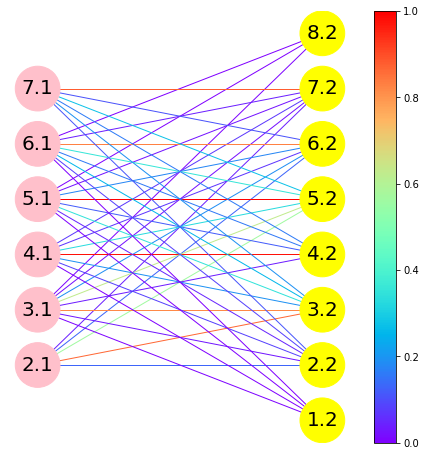

In [114]:
from matplotlib import cm
plt.figure(figsize=(6, 6))
cmap_edges = cm.get_cmap('rainbow')
edge_weights = [e[2]['weight'] for e in B.edges(data=True)]

nx.draw(B, pos=positions, with_labels=True, node_color=['pink']*len(bottom_nodes) +
        ['yellow']*len(top_nodes),  node_size=2000, font_size=20, edge_color=edge_weights, edge_cmap=cmap_edges)

# code for adding a colour bar, colour range normalised to [0,1]
vmin = 0
vmax = 1
sm = plt.cm.ScalarMappable(cmap=cmap_edges, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm)

plt.show()

In [74]:
positions

{2.1: array([0, 0]),
 3.1: array([0, 1]),
 4.1: array([0, 2]),
 5.1: array([0, 3]),
 6.1: array([0, 4]),
 7.1: array([0, 5]),
 1.2: array([1, 0]),
 2.2: array([1, 1]),
 3.2: array([1, 2]),
 4.2: array([1, 3]),
 5.2: array([1, 4]),
 6.2: array([1, 5]),
 7.2: array([1, 6]),
 8.2: array([1, 7])}

In [ ]:
positions = 

In [43]:
seven = offenses[offenses['Offense Classification'] == 7]

In [ ]:
sns.barplot(x=summary['Classification Algorithm Title'], y=summary['Mean CV Score'], palette = 'pastel')
plt.title('Model Summary')
plt.xlabel('Classification Algorithm Title')
plt.ylabel('Mean CV Score')
plt.xticks(rotation='vertical');